# **Visualización para análisis exporatorio**
# AE06. Seaborn Gráfico de Barras

Veamos más tipos de gráficos en Seaborn:


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
sns.__version__ # Revisamos que estemos en la última versión de seaborn

'0.13.2'

In [ ]:
# Importamos las librerias adicionales para el manejo numérico y de DataFrame
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
penguins_df = pd.read_csv("/content/drive/MyDrive/Gonzalo/CD-P2 ANÁLISIS EXPLORATORIO Y ESTADÍSTICA/Clase 2/VD02.csv").dropna()
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


## <font color='blue'>__Gráficos de barras__</font>

Para generar gráficos de barras tenemos múltiples opciones utilizando seaborn, pero siempre con la misma lógica de llamar simplemente a un método y obtener el gráfico asociado. En este caso el primer método corresponde a `sns.barplot(x=X, y=Y, data=df, errorbar='sd)`, el cual nos generara un gráfico de barras asociados a las variables que nosotros asignemos. Una cosa a notar es el parámetro `errorbar` el cual hace mención a intervalo de confianza, y que nosotros le hemos dado el valor de `'sd'`. Este método realizara una agregación de forma automática al momento de graficar:

[Documentación Barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html?highlight=barplot#seaborn.barplot)


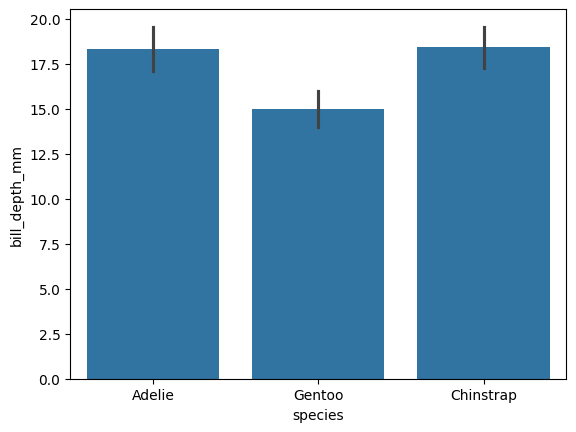

In [ ]:
sns.barplot(x='species', y ='bill_depth_mm', errorbar='sd',
            data=penguins_df)
plt.show()

**¿Qué será lo que está graficando?**

In [ ]:
penguins_df.groupby("species")['bill_depth_mm'].agg(['mean','std'])

,mean,std
species,,
Adelie,18.347260,1.219338
Chinstrap,18.420588,1.135395
Gentoo,14.996639,0.985998


La respuesta es el promedio y la desviación estándar para dichas columnas. Nosotros podríamos cambiar el método de agregación utilizando el parámetro `agg` y asignándole como valor una función. Ejemplo de una modificación donde muestre el conteo de elementos no nulos y sin barras de "error":

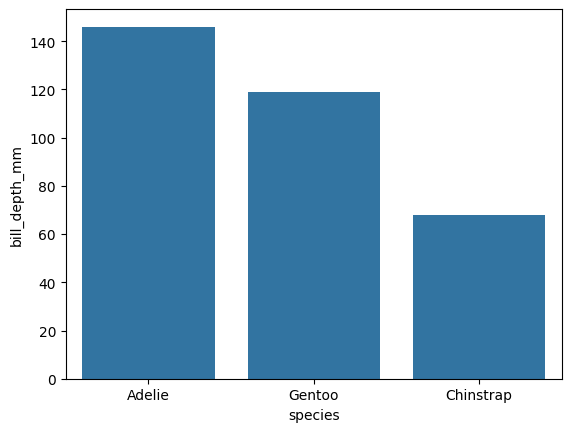

In [ ]:
# Dejamos el parametro errorbar=None para que evite calcular un intervalo de confianza
# y modificamos la función de agregación presente en el parametro `estimator`
sns.barplot(x='species', y ='bill_depth_mm', errorbar=None, estimator=pd.Series.count,
            data=penguins_df)
plt.show()

Alternativamente, existe un método genérico asociado a las variables categorías llamado: `sns.catplot`. Este método puede generar gráficos asociados a las variables categóricas de distinto tipo, utilizando el parámetro `kind` y para generar el primer gráfico de barra visto, simplemente declaramos `kind="bar"`:

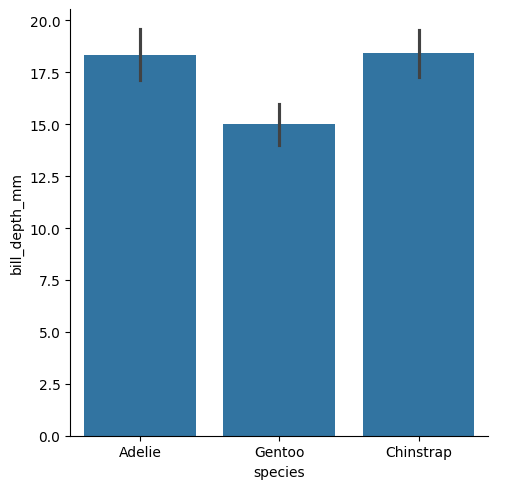

In [ ]:
sns.catplot(x="species", y="bill_depth_mm", kind="bar", data=penguins_df, errorbar='sd')
plt.show()

Además de `sns.barplot` y `sns.catplot`, tenemos el método `sns.countplot` el cual cuenta los elementos no nulos en las columna a graficar.

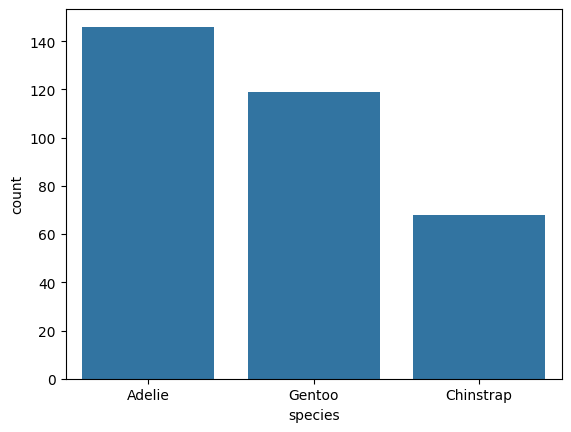

In [ ]:
sns.countplot(x='species', data=penguins_df)
plt.show()

Y a su vez, existe el `kind=count` en el método `sns.catplot`

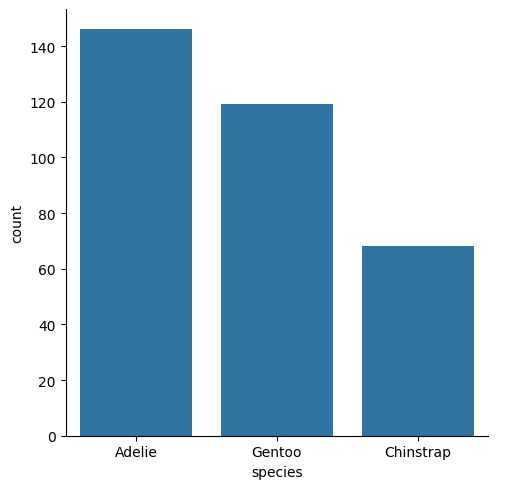

In [ ]:
sns.catplot(x="species", kind="count", data=penguins_df)
plt.show()

<font color='purple'>**EXPERIMENTO**</font><br>
Realizaremos un gráfico adicional, que muestre la relación entre la especie y bill_depth_mm, utilizando un boxplot.

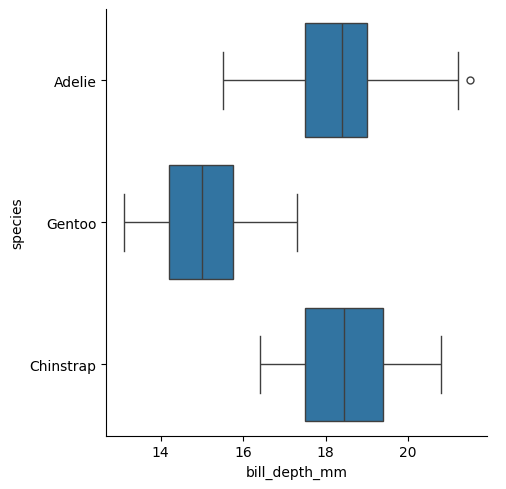

In [ ]:
sns.catplot(x="bill_depth_mm", y= "species", kind="box", data=penguins_df)
plt.show()

Este código está utilizando las bibliotecas seaborn (sns) y matplotlib.pyplot (plt) para generar un boxplot (gráfico de caja y bigotes) con el conjunto de datos penguins_df.

Se usa sns.catplot, que es una función de alto nivel para crear gráficos categóricos.

**x="bill_depth_mm":** El eje X corresponde a los valores de profundidad del pico de los pingüinos (bill_depth_mm).

**y="species":** El eje Y muestra las categorías de las especies de pingüinos (species).

**kind="box":** Indicas que quieres un boxplot, que resume la distribución de los datos numéricos para cada categoría.

**data=penguins_df:** El conjunto de datos que contiene las columnas bill_depth_mm y species.

**Visualización: plt.show()** muestra el gráfico generado.


**Este código produce un boxplot donde:**

Cada caja representa la distribución de la profundidad del pico (bill_depth_mm) para cada especie de pingüino.

La caja muestra los valores del cuartil inferior (Q1), la mediana (Q2), y el cuartil superior (Q3).

Los "bigotes" (líneas que sobresalen de las cajas) indican el rango de valores no atípicos, y los puntos fuera de estos bigotes representan valores atípicos.
Objetivo

El objetivo de este gráfico es comparar la distribución de la profundidad del pico entre las distintas especies de pingüinos para identificar diferencias significativas.

<font color='purple'>**FIN EXPERIMENTO**</font><br>